# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three observable trends:
1. Temperature correlates most closely with latitude comparing to Humidity (%), Cloudiness (%) and Wind Speed (mph). 
2. Looking at Latitude vs. Temperature Plot, it is not entirely symmetric around 0 latitude. For example, cities around -40 (Southern) tend to have higer Max Temp than cities around 40 (Northern). 
3. In general, there are more cities in Northern Hemisphere than in Southern Hemisphere. The cities in Northern Hemisphere are located within latitude range (0, 80) and (-50, 0) for Southern Hemisphere. So the cities' latitude range is wider for Northern Hemisphere. 

After each pair of plots (Northern Hemisphere and Southern Hemisphere), linear regression and their analysis are stated below. 

In [1]:
# install citipy library to get the city data
!pip install citipy

In [2]:
# Incorporate citipy to determine city based on latitude and longtitude
from citipy import citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of Latitudes and Longtitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Use random.uniform to make sure the picked up values are uniformally distributed
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat_lngs
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the ciry is unique, then add it to our city list
    if city not in cities:
        cities.append(city)
    
# print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty list to hold the values fetched later
temperature = []
city_id = []
city_name = []
latitude = []
longtitude = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
i = 1

# Write the endpoint url based on OpenWeather documentation
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# loop through each city collected above
for city in cities:
    response = requests.get(query_url + city).json()
    
    # Try to grab the values requested above if they are available in the OpenWeather API
    try:
        city_name.append(response['name'])
        city_id.append(response['id'])
        latitude.append(response['coord']['lat'])
        longtitude.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {i} | The city number is {response['id']}, city name is {response['name']} found! Appending stats")
        i = i + 1
    except:
        print("City not found. Skipping")
        pass
    

Processing Record 1 | The city number is 1015776, city name is Bredasdorp found! Appending stats
Processing Record 2 | The city number is 3081752, city name is Władysławowo found! Appending stats
Processing Record 3 | The city number is 5919850, city name is Chapais found! Appending stats
Processing Record 4 | The city number is 3843123, city name is Neuquén found! Appending stats
Processing Record 5 | The city number is 5106841, city name is Albany found! Appending stats
City not found. Skipping
Processing Record 6 | The city number is 6170031, city name is Tuktoyaktuk found! Appending stats
Processing Record 7 | The city number is 3366880, city name is Hermanus found! Appending stats
City not found. Skipping
Processing Record 8 | The city number is 964420, city name is Port Elizabeth found! Appending stats
City not found. Skipping
Processing Record 9 | The city number is 3831208, city name is Qaanaaq found! Appending stats
Processing Record 10 | The city number is 2208248, city name 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame
city_weather = pd.DataFrame({
    'City': city_name,
    'Lat': latitude,
    'Lng': longtitude, 
    'Max Temp': temp_max, 
    'Humidity': humidity, 
    'Cloudiness': clouds, 
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date 
})
city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,62.60,94,58,5.75,ZA,1616557552
1,Władysławowo,54.7909,18.4009,41.00,81,90,8.05,PL,1616557552
2,Chapais,49.7834,-74.8492,37.40,52,90,4.61,CA,1616557553
3,Neuquén,-38.9516,-68.0591,69.80,46,0,11.50,AR,1616557553
4,Albany,42.6001,-73.9662,52.00,60,100,3.20,US,1616557425
...,...,...,...,...,...,...,...,...,...
574,Termoli,41.9888,14.9895,46.44,64,51,17.65,IT,1616557776
575,Montepuez,-13.1256,38.9997,68.54,98,99,4.72,MZ,1616557776
576,Atambua,-9.1061,124.8925,82.02,74,61,4.16,ID,1616557777
577,Balgazyn,51.0000,95.2000,37.24,67,68,4.45,RU,1616557777


In [6]:
# Write the DataFrame to a CSV
city_weather.to_csv("output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Inspect if there is any city whose humidity>100%
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.634169,17.173268,56.078066,70.117444,52.953368,8.092815,1.616558e+09
std,33.000014,90.180861,24.870611,21.925717,39.601557,6.361407,9.571035e+01
min,-54.800000,-179.166700,-31.050000,9.000000,0.000000,0.450000,1.616557e+09
25%,-6.568200,-62.236250,41.000000,58.000000,8.000000,3.440000,1.616558e+09
50%,26.190300,23.916700,62.010000,74.000000,60.000000,6.490000,1.616558e+09
75%,47.521900,92.658350,75.705000,88.000000,93.000000,10.360000,1.616558e+09
max,78.218600,179.316700,93.600000,100.000000,100.000000,55.010000,1.616558e+09


In [8]:
# Though there is no city whose humidity>100%, I am showing the method below how to do it otherwise.

#  Get the index of cities that have humidity over 100%.
overhundred = city_weather.loc[city_weather["Humidity"] > 100, :]
index = overhundred.index

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = city_weather.drop(index)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,62.60,94,58,5.75,ZA,1616557552
1,Władysławowo,54.7909,18.4009,41.00,81,90,8.05,PL,1616557552
2,Chapais,49.7834,-74.8492,37.40,52,90,4.61,CA,1616557553
3,Neuquén,-38.9516,-68.0591,69.80,46,0,11.50,AR,1616557553
4,Albany,42.6001,-73.9662,52.00,60,100,3.20,US,1616557425
...,...,...,...,...,...,...,...,...,...
574,Termoli,41.9888,14.9895,46.44,64,51,17.65,IT,1616557776
575,Montepuez,-13.1256,38.9997,68.54,98,99,4.72,MZ,1616557776
576,Atambua,-9.1061,124.8925,82.02,74,61,4.16,ID,1616557777
577,Balgazyn,51.0000,95.2000,37.24,67,68,4.45,RU,1616557777


In [10]:
# Double check to ensure there is city whose humidity>100%
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.634169,17.173268,56.078066,70.117444,52.953368,8.092815,1.616558e+09
std,33.000014,90.180861,24.870611,21.925717,39.601557,6.361407,9.571035e+01
min,-54.800000,-179.166700,-31.050000,9.000000,0.000000,0.450000,1.616557e+09
25%,-6.568200,-62.236250,41.000000,58.000000,8.000000,3.440000,1.616558e+09
50%,26.190300,23.916700,62.010000,74.000000,60.000000,6.490000,1.616558e+09
75%,47.521900,92.658350,75.705000,88.000000,93.000000,10.360000,1.616558e+09
max,78.218600,179.316700,93.600000,100.000000,100.000000,55.010000,1.616558e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

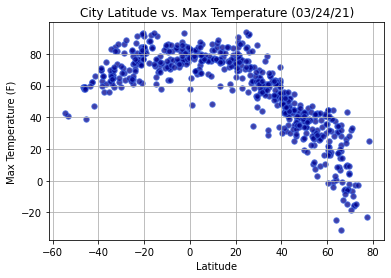

In [11]:
# Use the two columns Lat and Max Temp to plot a scatter chart
ts = time.gmtime(clean_city_data['Date'][0])
# print(time.strftime("%m/%d/%Y %H:%M:%S", ts)
datestr = time.strftime("%x",ts)

plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="darkblue", edgecolors="royalblue",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

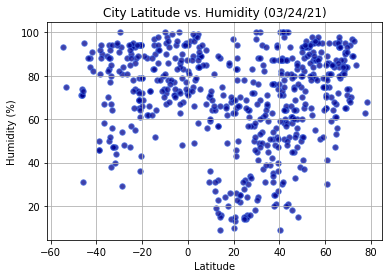

In [12]:
# Use the two columns Lat and Humidity to plot a scatter chart
ts = time.gmtime(clean_city_data['Date'][0])
ts
# print(time.strftime("%m/%d/%Y %H:%M:%S", ts)
datestr = time.strftime("%x",ts)
datestr

plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", facecolors="darkblue", edgecolors="royalblue",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Humidity ({datestr})") # {} !!!!!
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

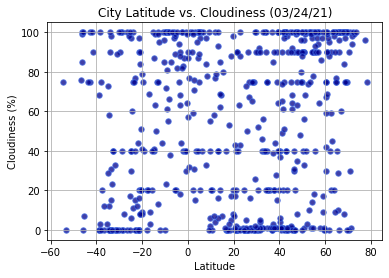

In [26]:
# Use the two columns Lat and Cloudiness to plot a scatter chart
ts = time.gmtime(clean_city_data['Date'][0])
ts
# print(time.strftime("%m/%d/%Y %H:%M:%S", ts)
datestr = time.strftime("%x",ts)
datestr

plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", facecolors="darkblue", edgecolors="royalblue",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

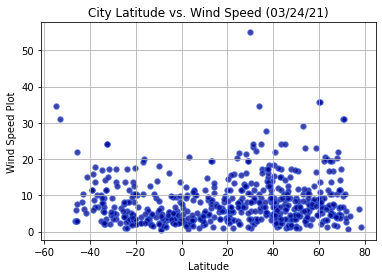

In [14]:
# Use the two columns Lat and Wind Speed to plot a scatter chart
ts = time.gmtime(clean_city_data['Date'][0])
ts
# print(time.strftime("%m/%d/%Y %H:%M:%S", ts)
datestr = time.strftime("%x",ts)
datestr

plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", facecolors="darkblue", edgecolors="royalblue",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed Plot")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [15]:
# Seperate the DataFrame clean_city_data into northern and southern
clean_city_data
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
northern


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Władysławowo,54.7909,18.4009,41.00,81,90,8.05,PL,1616557552
2,Chapais,49.7834,-74.8492,37.40,52,90,4.61,CA,1616557553
4,Albany,42.6001,-73.9662,52.00,60,100,3.20,US,1616557425
5,Tuktoyaktuk,69.4541,-133.0374,-2.20,71,75,11.50,CA,1616557555
8,Qaanaaq,77.4840,-69.3632,-22.99,63,96,6.26,GL,1616557556
...,...,...,...,...,...,...,...,...,...
572,Natchez,31.5604,-91.4032,62.60,88,90,11.50,US,1616557775
573,Pechenga,69.5259,31.1703,28.40,74,0,17.27,RU,1616557776
574,Termoli,41.9888,14.9895,46.44,64,51,17.65,IT,1616557776
577,Balgazyn,51.0000,95.2000,37.24,67,68,4.45,RU,1616557777


In [16]:
southern = clean_city_data.loc[clean_city_data["Lat"] < 0.0]
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,62.60,94,58,5.75,ZA,1616557552
3,Neuquén,-38.9516,-68.0591,69.80,46,0,11.50,AR,1616557553
6,Hermanus,-34.4187,19.2345,66.99,83,12,8.01,ZA,1616557555
7,Port Elizabeth,-33.9180,25.5701,66.20,88,0,9.22,ZA,1616557555
9,Kaitangata,-46.2817,169.8464,57.99,74,99,5.99,NZ,1616557556
...,...,...,...,...,...,...,...,...,...
567,Ayna,-12.6500,-73.9167,57.79,92,95,1.43,PE,1616557774
569,Majene,-3.5403,118.9707,85.75,67,68,5.17,ID,1616557774
570,Yulara,-25.2406,130.9889,82.40,47,0,8.05,AU,1616557775
575,Montepuez,-13.1256,38.9997,68.54,98,99,4.72,MZ,1616557776


In [17]:
# Define plotting function which will be used later
def plotLinearRegression(x_values, y_values,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, lblpos, fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8737631206402037


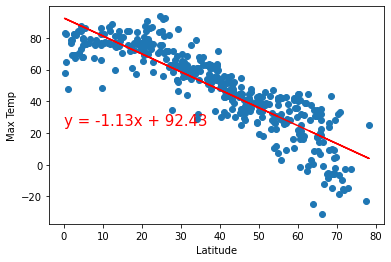

In [18]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Import note below
# look for a function called plotLinearRegression defined above, there are 6 variables which are different among graphs below: x_values, y_values, x-axis label, y-axis label, annotation position, and save to fig number

# define variable below
xlbl = "Latitude" # x-axis label
ylbl = "Max Temp" # y-axis label
lblpos = (0,25)

# look for a function called plotLinearRegression defined above, there are 6 variables which are different among graphs below: x_values, y_values, x-axis label, y-axis label, annotation position, and save to fig number
# This will be same concept for all graphs below
plotLinearRegression(northern['Lat'],northern['Max Temp'],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5923497961573898


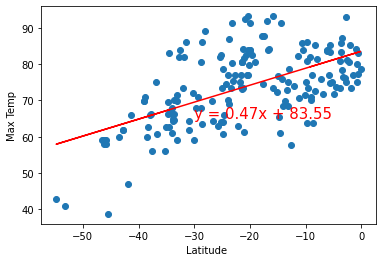

In [19]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# define variable below
xlbl = "Latitude "
ylbl = "Max Temp"
lblpos = (-30,65)

plotLinearRegression(southern['Lat'],southern['Max Temp'],xlbl,ylbl,lblpos,6)

Analysis: Based on above Northern Hemisphere - Max Temp vs. Latitude Linear Regression and Southern Hemisphere - Max Temp vs. Latitude Linear Regression: 

There is an obvious linear relationship between latitude and Max Temp in both Northern Hemisphere and Southern Hemisphere. As it gets closer to equator, the higher the Max Temp is. However Northern Hemisphere's r-value (absolute) is bigger than Southern Hemisphere's, indicating a stronger linear relationship. 



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24657031621787534


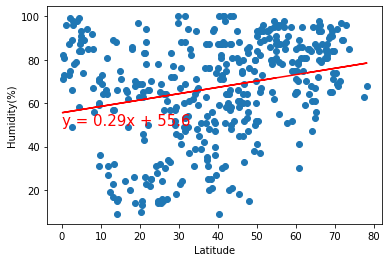

In [20]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression

# define variable below
xlbl = "Latitude" # x-axis label
ylbl = "Humidity(%)" # y-axis label
lblpos = (0,50)

plotLinearRegression(northern['Lat'],northern['Humidity'],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1742766617201819


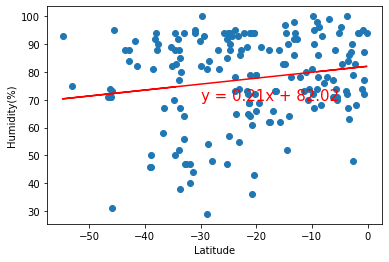

In [21]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression

# define variable below
xlbl = "Latitude" # x-axis label
ylbl = "Humidity(%)" # y-axis label
lblpos = (-30,70)

plotLinearRegression(southern['Lat'],southern['Humidity'],xlbl,ylbl,lblpos,8)

Analysis: Based on above Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression: 

There is no obvious or strong linear relationship between Humidity (%) and Latitude in both Northern Hemisphere and Southern Hemisphere. But it looks like in Northern Hemisphere, the further you are away from equator, the higher the humidity it is. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2216368118605341


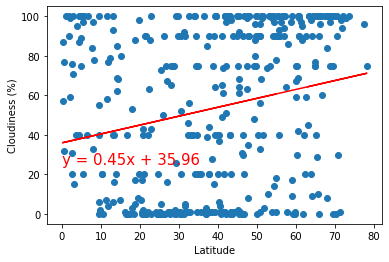

In [22]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# define variable below
xlbl = "Latitude" # x-axis label
ylbl = "Cloudiness (%)" # y-axis label
lblpos = (0,25)

plotLinearRegression(northern['Lat'],northern['Cloudiness'],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26142641738420763


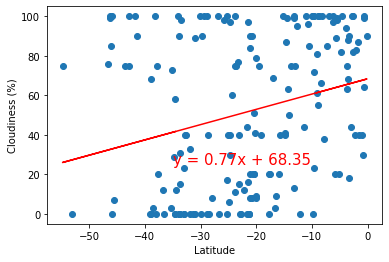

In [23]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# define variable below
xlbl = "Latitude" # x-axis label
ylbl = "Cloudiness (%)" # y-axis label
lblpos = (-35,25)

plotLinearRegression(southern['Lat'],southern['Cloudiness'],xlbl,ylbl,lblpos,10)

Analysis: Based on above Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression and Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:

There is no obvious or strong linear relationship between Cloudiness (%) and Latitude in both Northern Hemisphere and Southern Hemisphere. But in both Northern Hemisphere and Southern Hemisphere, if you focus on a specific latititude (draw a vertical line), the clouiness are mostly distributed within (0, 20) and (70, 100). 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10324499376501946


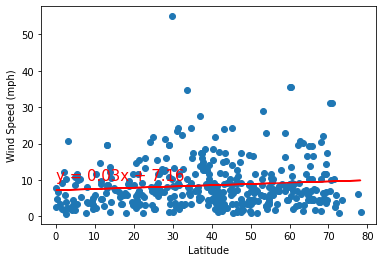

In [24]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# define variable below
xlbl = "Latitude" # x-axis label
ylbl = "Wind Speed (mph)" # y-axis label
lblpos = (0,10)

plotLinearRegression(northern['Lat'],northern['Wind Speed'],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3517290236280114


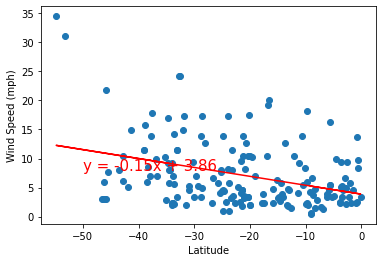

In [27]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# define variable below
xlbl = "Latitude" # x-axis label
ylbl = "Wind Speed (mph)" # y-axis label
lblpos = (-50,8)

plotLinearRegression(southern['Lat'],southern['Wind Speed'],xlbl,ylbl,lblpos,12)

Analysis: Based on above Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression and Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:

There is no obvious or strong linear relationship between Wind Speed (mph) and Latitude in both Northern Hemisphere and Southern Hemisphere. r-value is low for both graphs. But it tells us that in Northern Hemisphere the max Wind Speed (mph) shown is 40+ and in Southern Hemisphere the max Wind Speed (mph) is around 25. 
